In [1]:
#Import
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
#Clean the Data
Books = pd.read_csv('books.csv')

# Drop all Nan 
Books = Books.replace('0', np.nan).replace(0, np.nan).replace('',np.nan)
Books= Books.dropna(axis=0, how='any')

#Convert dataFrame to correct type
Books['Score'] = Books['Score'].astype(float)
Books['Year'] = Books['Year'].astype(int)
Books['Pages'] = Books['Pages'].astype(int)
Books.columns = Books.columns.str.strip()

#Reset index
Books = Books.reset_index()

In [156]:
Books

,index,Year,Author,Genre,Pages,Score,Title
0,0,2000,Jonathan Tweet,"Games,Role Playing Games,Fantasy,Games,Gaming,...",286,3.87,Player's Handbook: Core Rulebook 1
1,1,2000,Bernard Cornwell,"Historical,Historical Fiction,Fiction,Historic...",261,4.05,Sharpe's Prey
2,2,2000,Christopher Andersen,"Biography,Nonfiction,History",303,4.09,The Day John Died
3,3,2001,Warren Christopher,"Politics,Nonfiction",320,3.95,Chances of a Lifetime: A Memoir
4,4,2001,Jim Butcher,"Fantasy,Fantasy,Urban Fantasy,Mystery,Fiction,...",378,4.17,Grave Peril
...,...,...,...,...,...,...,...
8005,8005,2019,Diane Setterfield,"Historical,Historical Fiction,Fiction,Fantasy,...",419,3.98,Once Upon a River
8006,8006,2019,Gleb Tsipursky,"Business,Nonfiction,Leadership,Currency,Money,...",224,4.62,Never Go With Your Gut: How Pioneering Leaders...
8007,8007,2019,A.D. Zoltan,"Science Fiction,Artificial Intelligence,Fictio...",312,4.54,Conjunction
8008,8008,2019,Jean-Yves Ferri,"Sequential Art,Bande Dessinée,Sequential Art,C...",48,3.39,Die Tochter des Vercingetorix


## Create a Genre only dataFrame and Merge

In [83]:
Books_Genre = Books.copy()
Books_Genre.Genre = Books_Genre.Genre.apply(lambda x: x.split(','))

In [84]:
Books_Genre.head()

,Year,Author,Genre,Pages,Score,Title
0,2000,Jonathan Tweet,"[Games, Role Playing Games, Fantasy, Games, Ga...",286,3.87,Player's Handbook: Core Rulebook 1
1,2000,Bernard Cornwell,"[Historical, Historical Fiction, Fiction, Hist...",261,4.05,Sharpe's Prey
2,2000,Christopher Andersen,"[Biography, Nonfiction, History]",303,4.09,The Day John Died
3,2001,Warren Christopher,"[Politics, Nonfiction]",320,3.95,Chances of a Lifetime: A Memoir
4,2001,Jim Butcher,"[Fantasy, Fantasy, Urban Fantasy, Mystery, Fic...",378,4.17,Grave Peril


In [85]:
list_ = []
for index, item in enumerate(Books_Genre.Genre):
    list_.extend(map(lambda x: [index, x], item))
#     index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
genre.head()

,index,genres
0,0,Games
1,0,Role Playing Games
2,0,Fantasy
3,0,Games
4,0,Gaming


In [89]:
Books_Genre = pd.merge(Books_Genre.drop('Genre', axis=1), genre, how='right', left_index=True, right_on='index')
Books_Genre.head()

,Year,Author,Pages,Score,Title,index,genres
0,2000,Jonathan Tweet,286,3.87,Player's Handbook: Core Rulebook 1,0,Games
1,2000,Jonathan Tweet,286,3.87,Player's Handbook: Core Rulebook 1,0,Role Playing Games
2,2000,Jonathan Tweet,286,3.87,Player's Handbook: Core Rulebook 1,0,Fantasy
3,2000,Jonathan Tweet,286,3.87,Player's Handbook: Core Rulebook 1,0,Games
4,2000,Jonathan Tweet,286,3.87,Player's Handbook: Core Rulebook 1,0,Gaming


## Most Popular Genres

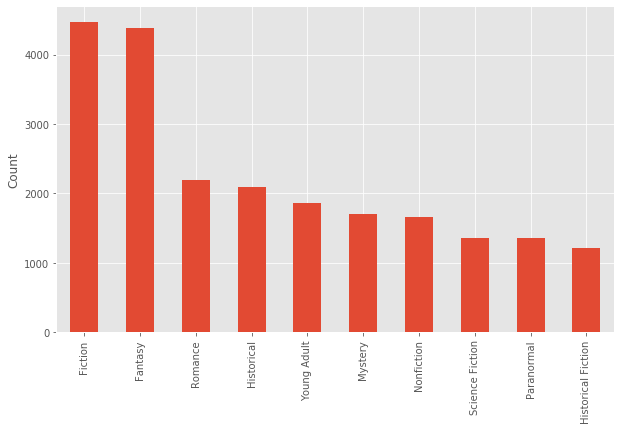

In [338]:
Books_Genre['genres'].value_counts()[:10].plot.bar()
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (20,10)

## Average of Review Scores

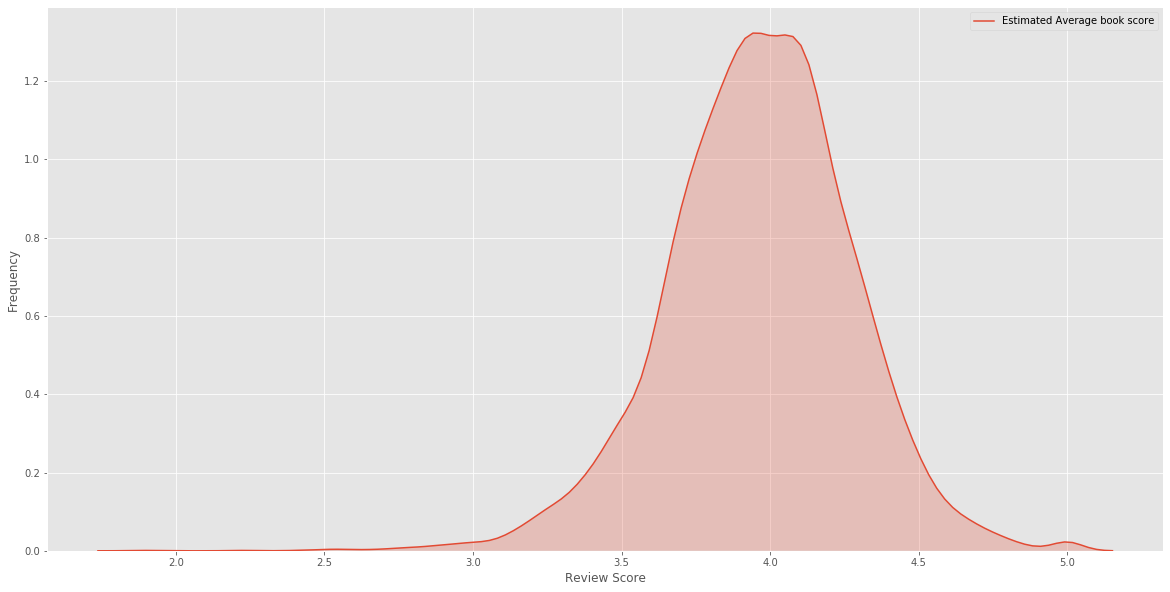

In [339]:
sns.kdeplot(Books['Score'], shade=True, label='Estimated Average book score')
plt.ylabel('Frequency')
plt.xlabel('Review Score')
plt.rcParams['figure.figsize'] = (20,10)

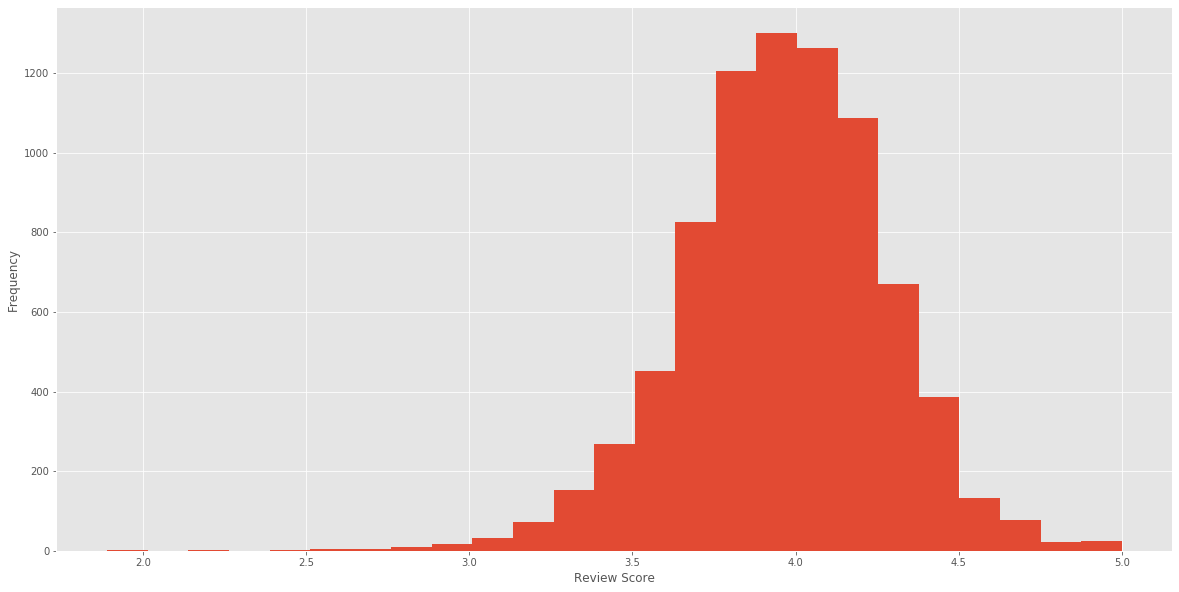

In [399]:
plt.hist(Books['Score'], bins=25)
plt.ylabel('Frequency')
plt.xlabel('Review Score')
plt.rcParams['figure.figsize'] = (20,10)

## Most Popular Authors

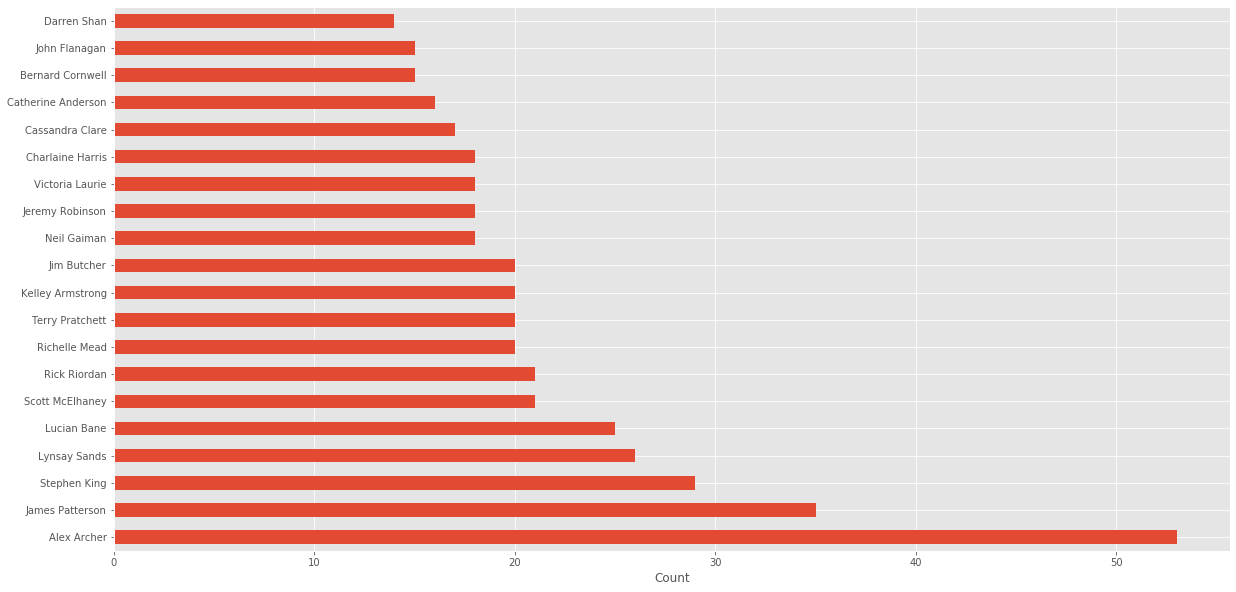

In [341]:
Books['Author'].value_counts()[:20].plot.barh()
plt.xlabel('Count')
plt.rcParams['figure.figsize'] = (20,10)

In [57]:
round(Books['Score'].mean(),2)

3.96

In [58]:
Books['Pages'].mean()

355.203620474407

## Correlation of Score & Page Number

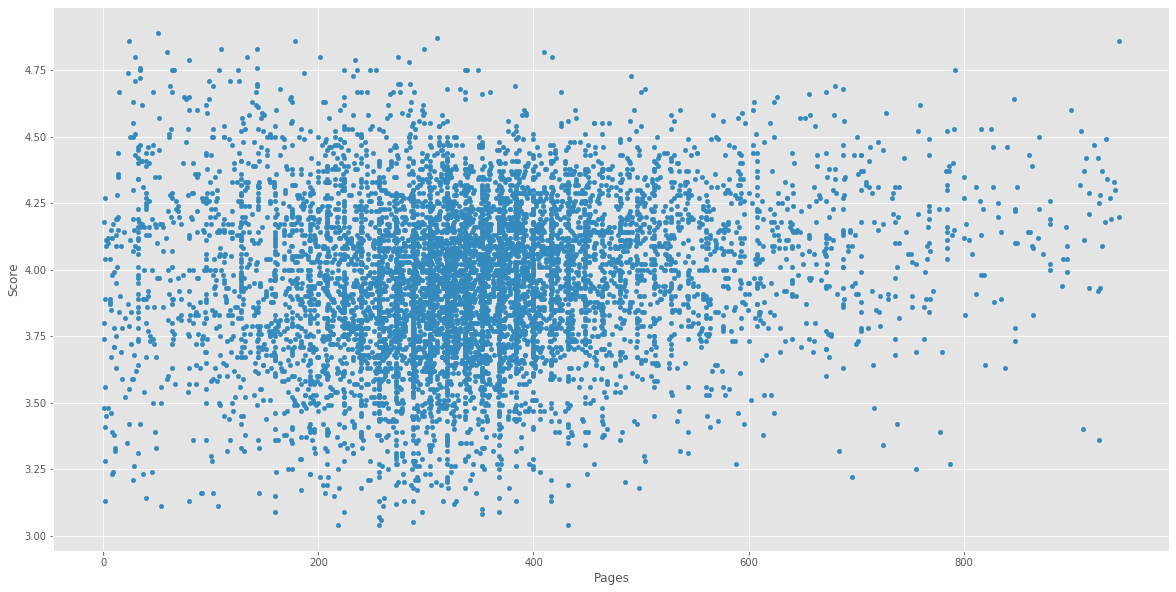

In [342]:
score_df = Books[['Pages', 'Score']]
score_df = score_df.loc[score_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
score_df.plot.scatter(x='Pages', y='Score')
plt.rcParams['figure.figsize'] = (20,10)

## Median of the Most Popular Authors

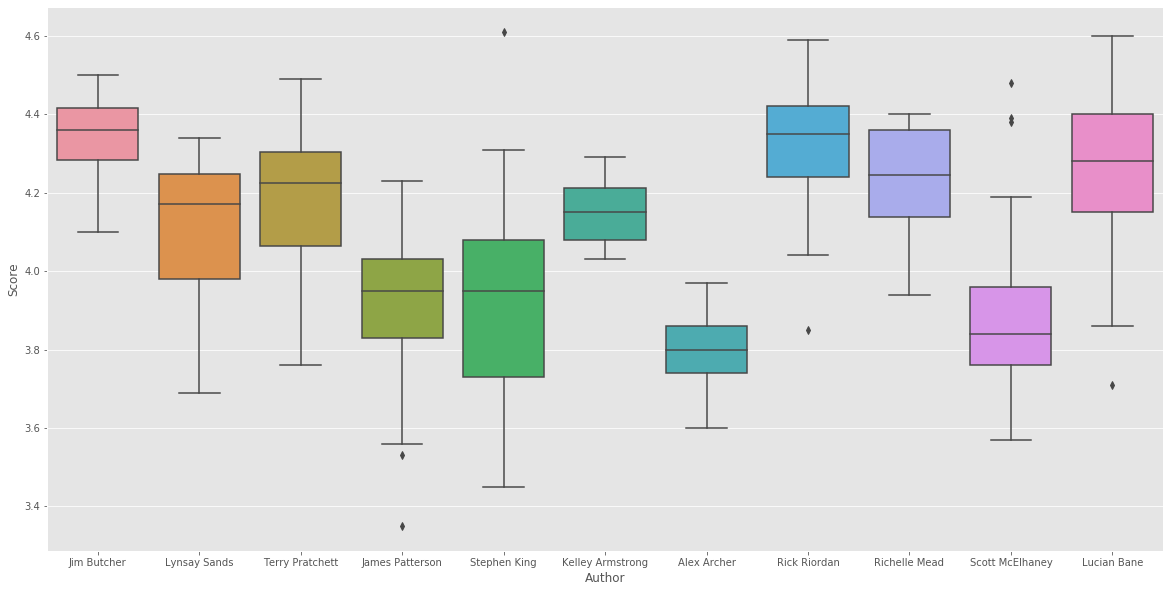

In [393]:
author_df = Books.groupby('Author').filter(lambda x: x.shape[0] > 18)
sns.boxplot(x='Author', y='Score', data=author_df)
#plt.ylabel('Average Review Score')
#plt.rcParams['figure.figsize'] = (20,10)

## Boxplot of Genres & Scores

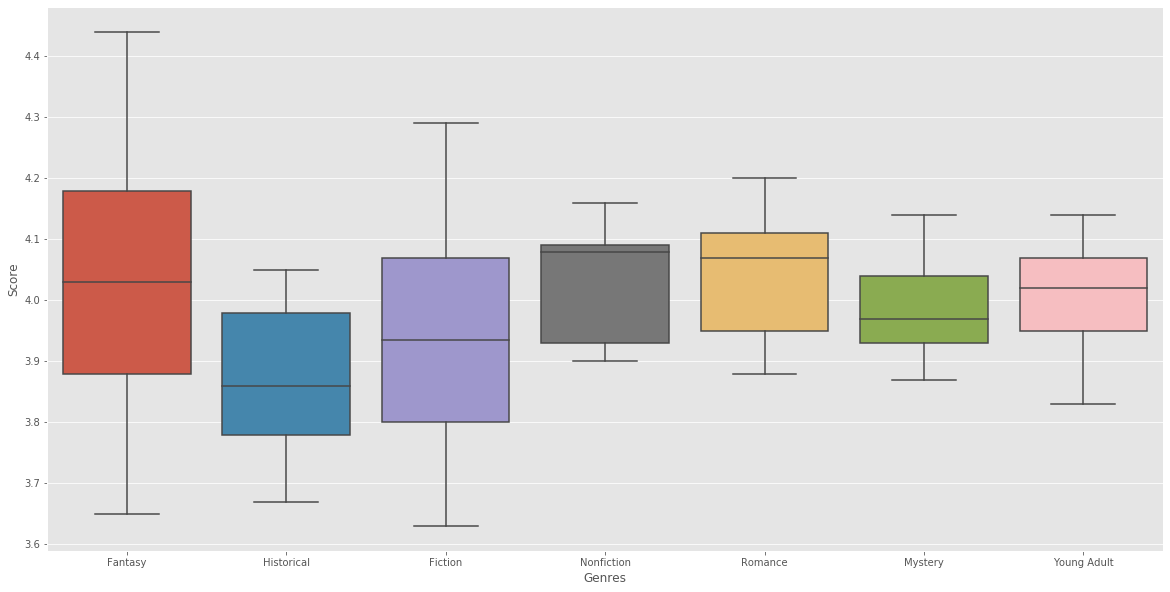

In [405]:
genres_df = Z.groupby(['Genres','Score']).filter(lambda x: x.shape[0] > 30)
sns.boxplot(x='Genres', y='Score', data=genres_df)
plt.rcParams['figure.figsize'] = (20,10)

## Boxplot of Scores Overtime

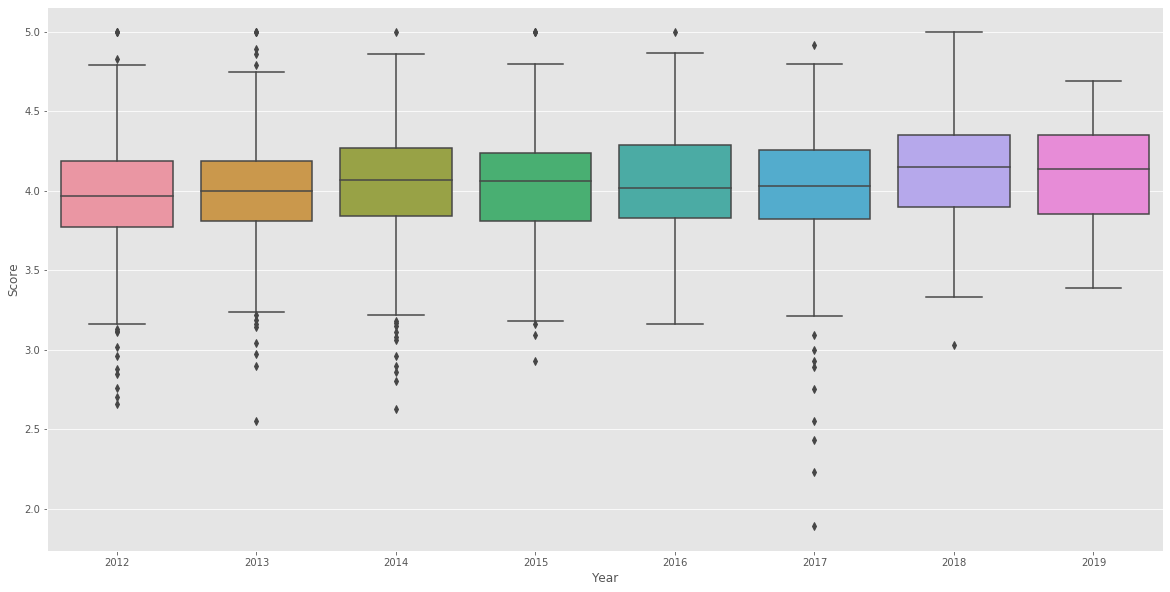

In [383]:
year_df =  Books[Books['Year'] > 2011]
sns.boxplot(x='Year', y='Score', data=year_df)
